## Описание проекта

Требуется оценить вклад различных факторов в изменение средней стоимости лечения в медицинской клинике в разные годы.

## Цель проекта

**Основная цель исследования:**

* проанализировать изменение выручки медицинского центра в 2022 году относительно 2021 и выявить ключевые факторы, повлиявшие на это изменение.

**Необходимые задачи для исследования:**
- предобработка данных;
- исследовательский анализ данных;
- подсчет выручки за 2021 и 2022 годы, оценка изменений;
- факторный анализ, выдвижение и проверка гипотез;
- подготовка презентации.

## Описание полученных данных

Файл `data_test_task_2022.xlsx`:
    
* `record_id` - уникальный идентификатор строки данных;
* `service_date` - дата оказания медицинской услуги;
* `service_name` - наименование медицинской услуги;
* `service_number` - количество услуг;
* `service_amount` - сумма выплат (стоимость оказанных услуг в рублях);
* `insured` - уникальный идентификатор пациента;
* `sex_id` - пол пациента;
* `age_for_service_date` - возраст пациента.

## Загрузка и подготовка данных

In [1]:
# загрузка библиотек
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка файлов
df = pd.read_excel(
    requests.get(
        'https://cloud-api.yandex.net/v1/disk/public/resources/download?' +
        'public_key=' +
        'https://disk.yandex.ru/d/Q2o2zUlRpLwpfQ'
        ).json()['href']
)

In [3]:
# выведем информацию по таблице
display(df.head())
df.info()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


## Предобработка данных

In [4]:
df.columns

Index(['record_id', 'service_date', 'service_name', 'service_amount',
       'service_number', 'insured', 'sex_id', 'age_for_service_date'],
      dtype='object')

Пробелов в названиях не обнаружено.

In [5]:
# проверим таблицы на наличие пропусков
df.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [6]:
# проверим таблицы на наличие явных дубликатов
print('Количество явных дубликатов в файлах:', df.duplicated().sum())

Количество явных дубликатов в файлах: 0


***Вывод:*** Дубликатов в данных не обнаружено. Заменим пустые значения в столбце `sex_id` на `0`.

In [7]:
# просмотр пустых значений
df[df['sex_id'].isna()]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


Всего пропуски у двух пациентов с идентификаторами `221581` и `512590`.

In [8]:
# выводим уникального пациента с индендификатором 512590
df[df['insured'] == 512590]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


По полученным данным видим, что пол пациента `2.0`. Заменим данные в столбце о пациенте.

In [9]:
df.loc[(df['sex_id'].isna()) & (df['insured'] == 512590), 'sex_id'] = df[df['insured'] == 512590]['sex_id'].max()

In [10]:
# просмотр оставшихся пропусков
df[df['sex_id'].isna()]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
8880,30620882903,2021-04-22,Прием первичный,1470,1,221581,NaN,42
8881,30620883003,2021-04-29,Прием повторный,1313,1,221581,NaN,42
12357,30786036703,2021-05-31,Прием первичный,1470,1,221581,NaN,42
17987,30961733903,2021-06-21,Прием повторный,1313,1,221581,NaN,42


In [11]:
# выводим уникального пациента с индендификатором 221581
df[df['insured'] == 221581]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
8880,30620882903,2021-04-22,Прием первичный,1470,1,221581,NaN,42
8881,30620883003,2021-04-29,Прием повторный,1313,1,221581,NaN,42
12357,30786036703,2021-05-31,Прием первичный,1470,1,221581,NaN,42
17987,30961733903,2021-06-21,Прием повторный,1313,1,221581,NaN,42


In [12]:
# замена пустых значений
df['sex_id'] = df['sex_id'].fillna(0)

In [13]:
# проверим таблицы на наличие пропусков
df.isna().sum()

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
dtype: int64

## Исследовательский анализ данных

### Распределение пациентов по полу

In [14]:
# отбираем уникальные значения
df_person_unique = df.drop_duplicates(subset=["insured"], keep='first')
df_person_unique.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
12,30268158203,2021-01-27,Прием повторный,1313,1,232418,2.0,25
17,30268158703,2021-01-15,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,177372,2.0,25
29,30268159903,2021-01-05,"ЛПНП (липопротеиды низкой плотности, бета-липо...",287,1,418179,1.0,40
50,30268162003,2021-01-28,Ультразвуковое исследование щитовидной железы ...,1890,1,174109,2.0,35


In [15]:
# считаем кол-во пациентов по полу
grouping_by_sex = df_person_unique[df_person_unique.sex_id != 0].groupby('sex_id').agg(counter=("insured", 'count')) 
grouping_by_sex = grouping_by_sex.reset_index() 
grouping_by_sex

,sex_id,counter
0,1.0,1932
1,2.0,2555


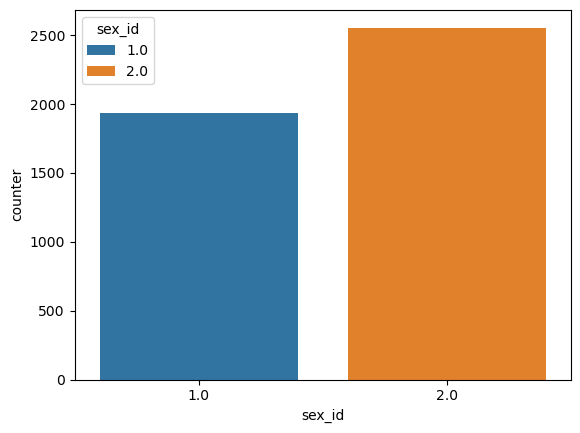

In [16]:
# строим график
ax = sns.barplot(x='sex_id', y='counter', hue='sex_id', data=grouping_by_sex, ci= None, dodge=False)

**Вывод:** по графику видно, что пациентов с полом `1.0` (32544) меньше, чем пациентов с полом `2.0` (52821).

### Топ 10 предоставляемых процедур

In [17]:
df.service_name.value_counts()[:10]

service_name
Прием первичный                                  6058
Прием повторный                                  4477
Взятие крови из периферической вены              4215
Общий анализ крови (лейкоцитарная форм,, СОЭ)    3190
Магнитотерапия (1 сеанс)                         2838
Взятие мазка                                     1567
Общий анализ мочи                                1550
Лазеротерапия (1 сеанс)                          1313
Интерференционные токи (1 сеанс) (4 поля)        1195
Гинекологический мазок                           1194
Name: count, dtype: int64

### Распределение по возрастным группам

In [18]:
df_person_unique.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
12,30268158203,2021-01-27,Прием повторный,1313,1,232418,2.0,25
17,30268158703,2021-01-15,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,177372,2.0,25
29,30268159903,2021-01-05,"ЛПНП (липопротеиды низкой плотности, бета-липо...",287,1,418179,1.0,40
50,30268162003,2021-01-28,Ультразвуковое исследование щитовидной железы ...,1890,1,174109,2.0,35


Уникальные значения возраста пациентов. Выделим несколько диапазонов: до 17, от 18 до 25, от 26 до 35, от 36 до 45, от 46 до 55 и 56+ 

In [19]:
df_person_unique.age_for_service_date.value_counts().keys()

Index([33, 31, 35, 34, 27, 37, 29, 36, 30, 32, 38, 25, 26, 28, 24, 23, 39, 42,
       40, 41, 43, 44, 22, 45,  3, 46, 47,  4,  9, 49,  7,  6,  5,  2, 48, 50,
        8, 21,  1,  0, 53, 51, 10, 52, 55, 57, 11, 14, 16, 54, 13, 59, 15, 61,
       58, 56, 60, 20, 12, 19, 62, 63, 18, 65, 17, 70, 67, 64, 68, 66, 69, 83,
       72, 74, 75, 71],
      dtype='int64', name='age_for_service_date')

Сделаем столбец `age` целого типа, чтобы писать для условия выборки. А столбец `age_for_service_date` поменяем на строковый тип чтобы записать возрастные диапазоны.

In [20]:
df_age_groups = df_person_unique[['insured', 'age_for_service_date']]
df_age_groups = df_age_groups.reset_index(drop=True)
df_age_groups['age'] = df_age_groups.age_for_service_date
df_age_groups.age_for_service_date = df_age_groups.age_for_service_date.astype(str)
df_age_groups.head()

,insured,age_for_service_date,age
0,490777,26,26
1,232418,25,25
2,177372,25,25
3,418179,40,40
4,174109,35,35


In [21]:
#создаем возрастные диапазоны
df_age_groups.loc[df_age_groups.age <= 17, 'age_for_service_date'] = 'до 17'
df_age_groups.loc[(df_age_groups.age >= 18) & (df_age_groups.age <= 25), 'age_for_service_date'] = 'от 18 до 25'
df_age_groups.loc[(df_age_groups.age >= 26) & (df_age_groups.age <= 35), 'age_for_service_date'] = 'от 26 до 35'
df_age_groups.loc[(df_age_groups.age >= 36) & (df_age_groups.age <= 45), 'age_for_service_date'] = 'от 36 до 45'
df_age_groups.loc[(df_age_groups.age >= 46) & (df_age_groups.age <= 55), 'age_for_service_date'] = 'от 46 до 55'
df_age_groups.loc[df_age_groups.age >= 56, 'age_for_service_date'] = '56+'

In [22]:
#делаем группировку и сортируем для наглядности
grouping_by_age = df_age_groups.groupby('age_for_service_date').agg(counter=("insured", 'count')) 
grouping_by_age = grouping_by_age.reset_index() 
grouping_by_age.sort_values(by=['counter'], inplace=True, ascending=False)
grouping_by_age

,age_for_service_date,counter
3,от 26 до 35,1738
4,от 36 до 45,1160
1,до 17,548
2,от 18 до 25,543
5,от 46 до 55,356
0,56+,143


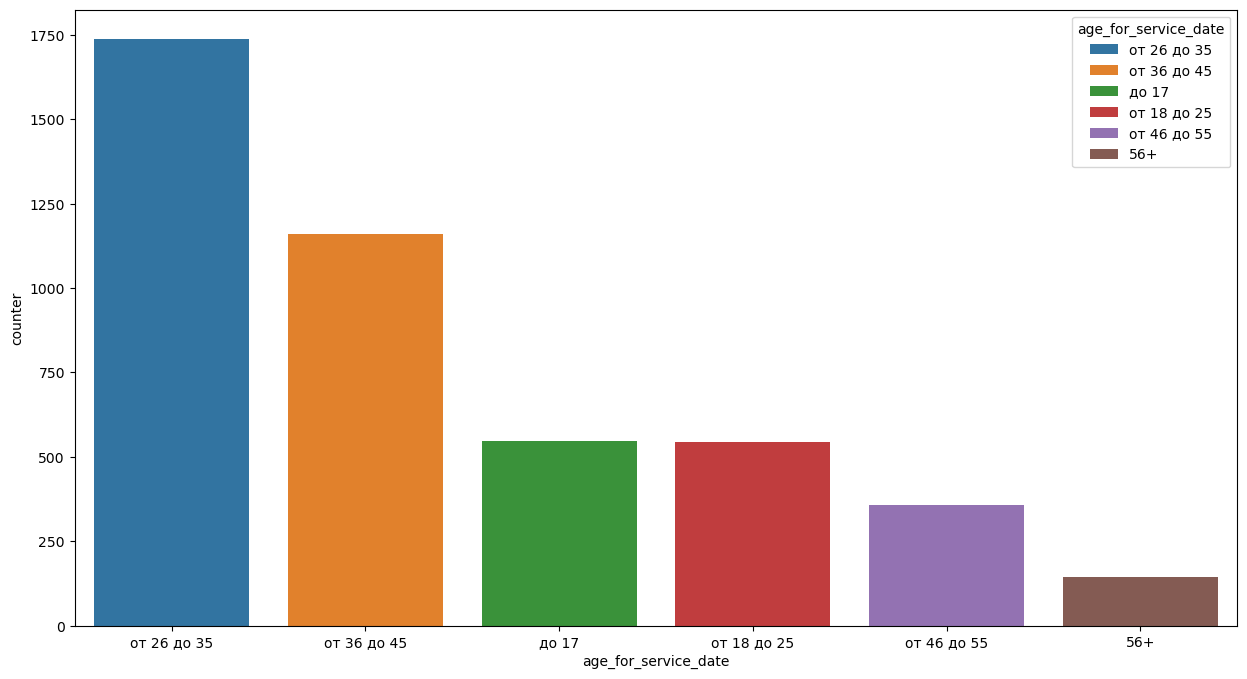

In [23]:
#визуализация данных возрастного диапазона
plt.figure(figsize=(15,8))
ax = sns.barplot(x='age_for_service_date', y='counter', hue='age_for_service_date', data=grouping_by_age, ci= None, dodge=False)

**Вывод:** По данным с графика можно увидеть, что люди в возрасте `56+` занимают наименьший процент посетителей клиники, в то время как люди в возрасте `от 26 до 35` занимают наибольший. Скорее всего это связано с тем, что медицинское клиника частного типа.

Обычно пожилые люди не имеют денег и они предпочитают ходить в бесплатные поликлиники, в то время как работающее покаление предпочитает не тратить своё время и посещать платные учреждения, где нет больших очередей и условия лучше (интерьер, оборудование, внимательность персонала).

### Количество посещений пациентов

In [24]:
#делаем группировку и сортируем для наглядности
grouping_by_insured = df.groupby(['insured', 'service_date']).agg(counter=("record_id", 'count')) 
grouping_by_insured = grouping_by_insured.reset_index() 
grouping_by_insured.sort_values(by=['counter'], inplace=True, ascending=False)
grouping_by_insured

,insured,service_date,counter
28680,1154928,2022-07-21,35
19581,716072,2021-10-15,33
14508,634778,2021-06-08,32
965,175058,2021-06-22,32
1709,194724,2021-01-20,31
...,...,...,...
18210,698062,2021-10-25,1
18214,698062,2021-10-30,1
18215,698062,2021-11-01,1
18216,698062,2021-11-02,1


In [25]:
grouping_by_insured_and_date = grouping_by_insured.groupby('insured').agg(counter=('service_date', 'count')) 
grouping_by_insured_and_date = grouping_by_insured_and_date.reset_index()
grouping_by_insured_and_date.sort_values(by=['counter'], inplace=True, ascending=False)
grouping_by_insured_and_date

,insured,counter
846,490750,94
712,418193,78
1773,634801,75
682,402409,75
159,180725,73
...,...,...
2266,698323,1
3635,935543,1
2265,698322,1
3633,935541,1


In [26]:
grouping_by_insured_and_date['counter_str'] = grouping_by_insured_and_date['counter'].astype(str)
grouping_by_insured_and_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, 846 to 3505
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   insured      4488 non-null   int64 
 1   counter      4488 non-null   int64 
 2   counter_str  4488 non-null   object
dtypes: int64(2), object(1)
memory usage: 140.2+ KB


In [27]:
#создаем количественные диапозоны
grouping_by_insured_and_date.loc[grouping_by_insured_and_date.counter == 1, 'counter_str'] = '1'
grouping_by_insured_and_date.loc[(grouping_by_insured_and_date.counter >= 2) & (grouping_by_insured_and_date.counter <= 5), 'counter_str'] = '2 - 5'
grouping_by_insured_and_date.loc[(grouping_by_insured_and_date.counter >= 6) & (grouping_by_insured_and_date.counter <= 20), 'counter_str'] = '6 - 20'
grouping_by_insured_and_date.loc[(grouping_by_insured_and_date.counter >= 21) & (grouping_by_insured_and_date.counter <= 40), 'counter_str'] = '21 - 40'
grouping_by_insured_and_date.loc[grouping_by_insured_and_date.counter >= 41, 'counter_str'] = '41+'
grouping_by_insured_and_date.sort_values(by=['counter'], inplace=True, ascending=False)

In [28]:
grouping_by_counter_str = grouping_by_insured_and_date.groupby('counter_str').agg(counter=('insured', 'count')) 
grouping_by_counter_str = grouping_by_counter_str.reset_index()
grouping_by_counter_str = grouping_by_counter_str.reindex([0, 1, 4, 2, 3])
grouping_by_counter_str

,counter_str,counter
0,1,1133
1,2 - 5,1692
4,6 - 20,1363
2,21 - 40,253
3,41+,47


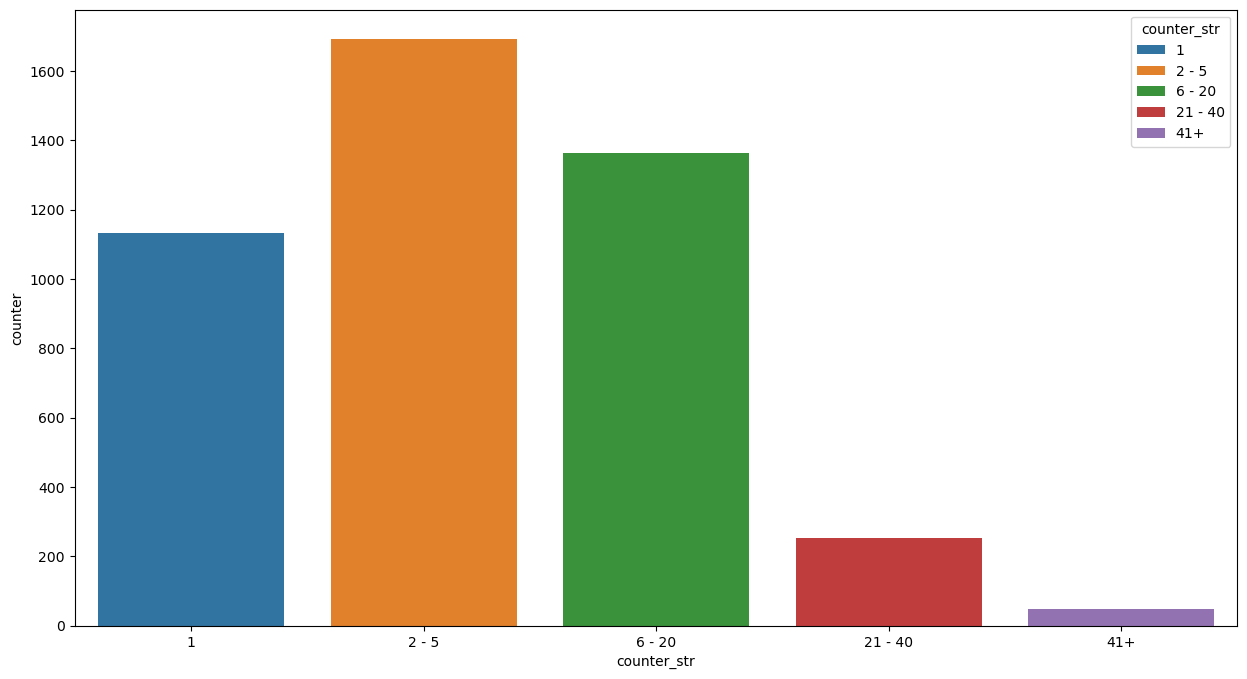

In [29]:
#визуализация данных возрастного диапазона
plt.figure(figsize=(15,8))
ax = sns.barplot(x='counter_str', y='counter', hue='counter_str', data=grouping_by_counter_str, ci= None, dodge=False)

## Подсчет выручки за 2021 и 2022 годы, оценка изменений

### 1. Подсчет выручки за 2021 и за 2022 года, и сравнить их

In [30]:
#общая сумма выручки
df['service_amount'].sum()

99548333

In [31]:
# выручка по дням 
df.groupby('service_date')['service_amount'].sum()

service_date
2021-01-03     38666
2021-01-04     63382
2021-01-05    103989
2021-01-06     57736
2021-01-07     58183
               ...  
2022-08-27     83358
2022-08-28     61773
2022-08-29    154403
2022-08-30    129709
2022-08-31    180060
Name: service_amount, Length: 602, dtype: int64

In [32]:
#сумма выручки за 2021 год
service_date_2021 = df.query("service_date >= '2021-01-01' & service_date <= '2021-12-31'")
print('Сумма выручки за 2021 год:', service_date_2021['service_amount'].sum())

#сумма выручки за 2022 год
service_date_2022 = df.query("service_date >= '2022-01-01' & service_date <= '2022-12-31'")
print('Сумма выручки за 2022 год:', service_date_2022['service_amount'].sum())

Сумма выручки за 2021 год: 50561671
Сумма выручки за 2022 год: 48986662


Сумма выручки за 2021 год больше, чем за 2022 год. Так как за 2022 год данные не все, а только до августа, поэтому сравнивать подсчет выручки не целесообразно. Попробуем сравнить выручку до августа (включительно) между годами.

In [33]:
#сумма выручки за 2021 год январь-август
service_date_2021_08 = df.query("service_date >= '2021-01-01' & service_date <= '2021-08-31'")
print('Cумма выручки за 2021 год январь-август:', service_date_2021_08['service_amount'].sum())

#сумма выручки за 2022 год
service_date_2022_08 = df.query("service_date >= '2022-01-01' & service_date <= '2022-08-31'")
print('Сумма выручки за 2022 год январь-август:', service_date_2022_08['service_amount'].sum())

Cумма выручки за 2021 год январь-август: 29957552
Сумма выручки за 2022 год январь-август: 48986662


Теперь мы видим, что если брать в анализ одинаковое кол-во месяцев, то за 2022 год медицинский центр заработал больше. Скорее всего будь данные в полном объеме, то 2022 год показал прибыльные результаты при анализе.

### 2. Подсчитать выручку топ 10 услуг 2021 года и 2022 года, и сравнить их

In [34]:
#топ 10 услуг по выручке за 2021 год
service_date_2021_sum = service_date_2021.groupby('service_name')['service_amount'].sum().sort_values(ascending = False)
service_date_2021_sum.head(10)

service_name
Прием первичный                                                         8960915
Прием повторный                                                         5919439
Магнитотерапия (1 сеанс)                                                1467660
Комплексная мануальная терапия                                          1261260
Общий анализ крови (лейкоцитарная форм,, СОЭ)                           1178259
Ультразвуковое исследование гинекология трансвагинально с ДС сосудов     856290
Сеанс рефлексотерапии                                                    852138
Ультразвуковое исследование брюшной полости                              735720
Сеанс SIS терапии, длинный цикл, 1 зона                                  681555
Интерференционные токи (1 сеанс) (4 поля)                                644300
Name: service_amount, dtype: int64

In [35]:
#топ 10 услуг по выручке за 2022 год
service_name_2022_sum = service_date_2022.groupby('service_name')['service_amount'].sum().sort_values(ascending = False)
service_name_2022_sum.head(10)

service_name
Магнитотерапия (1 сеанс)                                                1588620
Прием трапевта, первичный                                               1452930
Прием гинеколога, повторный                                             1343760
Общий анализ крови (лейкоцитарная форм,, СОЭ)                           1128850
Прием отоларинголога, первичный                                         1118820
Комплексная мануальная терапия                                          1096300
Прием невролога, первичный                                              1072920
Ультразвуковое исследование гинекология трансвагинально с ДС сосудов    1016540
Прием офтальмолога,  первичный                                           821520
Прием гинеколога, первичный                                              811220
Name: service_amount, dtype: int64

За 2021 го самая прибыльная услуга - `Прием первичный`. За 2022 год самая прибыльная услугу - `Магнитотерапия (1 сеанс)`.

### 3. Какие были предоставленны услуги в 2022 году, которых не было в 2021 году. И какие услуги были в 2021 году, но не предоставлялись в 2022 году.

In [36]:
#какие были предоставленны уникальные услуги в 2021 году
unique_services_2021_list = list(service_date_2021.service_name.unique())
unique_services_2021_list[:10]

['Прием первичный',
 'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
 'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
 'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
 'Ревматоидный фактор',
 'С-реактивный белок',
 'Взятие крови из периферической вены',
 'Магнитотерапия (1 сеанс)',
 'УВЧ-терапия (1 сеанс) (1 поле)',
 'Прием повторный']

In [37]:
#какие были предоставленны уникальные услуги в 2022 году
unique_services_2022_list = list(service_date_2022.service_name.unique())
unique_services_2022_list[:10]

['Магнитотерапия (1 сеанс)',
 'СМТ-форез (1 сеанс) (2 поля)',
 'Прием невролога, повторный',
 'Прием физиотерапевта, повторный',
 'Классический лечебный массаж шейно-грудного отдела',
 'Прием отоларинголога, первичный',
 'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
 'Общий анализ мочи',
 'Взятие крови из периферической вены',
 'Прием отоларинголога, повторный']

In [38]:
#услуги, которые предоставлялись в 2021 году, но не в 2022 году
list(set(unique_services_2021_list) - set(unique_services_2022_list))[:10]

['Сифилис IgM',
 'Кортизол (суточная моча)',
 'Доплерометрия при нейросонографии',
 'Перевязка гнойных ран (более 4см,кв.)',
 'Рентгенография, рентгеноскопия пищевода',
 'Эхоэнцефалография',
 'HSV 2 (вирус простого герпеса 2) (Кровь)',
 'Комбинированная ударно - волновая терапия  (рассеивающий и фокусирующий датчики) - 1 зона, 1 сеанс',
 'Посев отдел, женск. полов. органов - влагалища с определением чувствительности  к антибиотикам и бактериофагам',
 'Вакцинация вакциной MMR II (от кори, краснухи, паротита)']

In [39]:
#услуги, которые предоставлялись в 2022 году, но не в 2021 году
list(set(unique_services_2022_list) - set(unique_services_2021_list))[:10]

['Вакцинация вакциной "Варилрикс"',
 'Ультразвуковое исследование глазного яблока',
 'Иммунный статус (стандартный) с заключением',
 'Сифилис RPR (кардиолипиновый а/ген)',
 'Ультразвуковое исследование гинекология трансвагинально',
 'Классический лечебный массаж пояснично-крестцового отдела',
 'КОРОВЬЕ МОЛОКО IgE',
 'Прием терапевта, первичный',
 'Удаление подошвенной бородавки (1 кв,см)',
 'Боррелия (Burgdorferi) IgG']

**Вывод:** по этим данным можно дополнительно провести группировку по похожим услугам и предоставить эти данные для клиники, чтобы они обратили внимания, что либо эти услуги перестали пользоваться спросом в 2022 году, либо предоставить список услуг которые начали предоставляться в 2022 году и провести по ним расчет прибыли и расходов в общем по клинике.

## Факторный анализ, выдвижение и проверка гипотез

1. **Гипотеза - клиенты от 7 до 20 лет зачастую сдают анализы в начале осени либо в конце мая для поступления в школу/универ/армия.**
2. **Гипотеза - пожилые клиенты в среднем платят меньше за услуги, чем рабочее поколенее**
3. **Гипотеза - самые часто предоставляемые услуги входят в перечень необходимых услуг для мед осмотра (щкола/универ/работа/армия)**

### 1. Гипотеза - клиенты от 7 до 20 лет зачастую сдают анализы в начале осени либо в конце мая для поступления в школу/универ/армия.

In [40]:
teenagers_df = df[(df['age_for_service_date'] >= 7) & (df['age_for_service_date'] <= 20)]
teenagers_df.service_date = teenagers_df.service_date.astype(str)
teenagers_df.service_date = teenagers_df.service_date.apply(lambda x: '-'.join(x.split('-')[:-1]))
teenagers_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
427,30268199703,2021-01,Прием первичный,1470,1,531983,1.0,16
428,30268199803,2021-01,Магнитотерапия (1 сеанс),1040,1,531983,1.0,16
429,30268199903,2021-01,Магнитотерапия (1 сеанс),1040,1,531983,1.0,16
430,30268200003,2021-01,Магнитотерапия (1 сеанс),1040,1,531983,1.0,16
431,30268200103,2021-01,Магнитотерапия (1 сеанс),1040,1,531983,1.0,16


In [41]:
teenagers_df_grouping_by_service_date = teenagers_df.groupby('service_date').agg(counter=("record_id", 'count')) 
teenagers_df_grouping_by_service_date = teenagers_df_grouping_by_service_date.reset_index() 
teenagers_df_grouping_by_service_date.sort_values(by=['service_date'], inplace=True, ascending=True)
teenagers_df_grouping_by_service_date

,service_date,counter
0,2021-01,106
1,2021-02,182
2,2021-03,220
3,2021-04,234
4,2021-05,136
5,2021-06,102
6,2021-07,79
7,2021-08,155
8,2021-09,409
9,2021-10,262


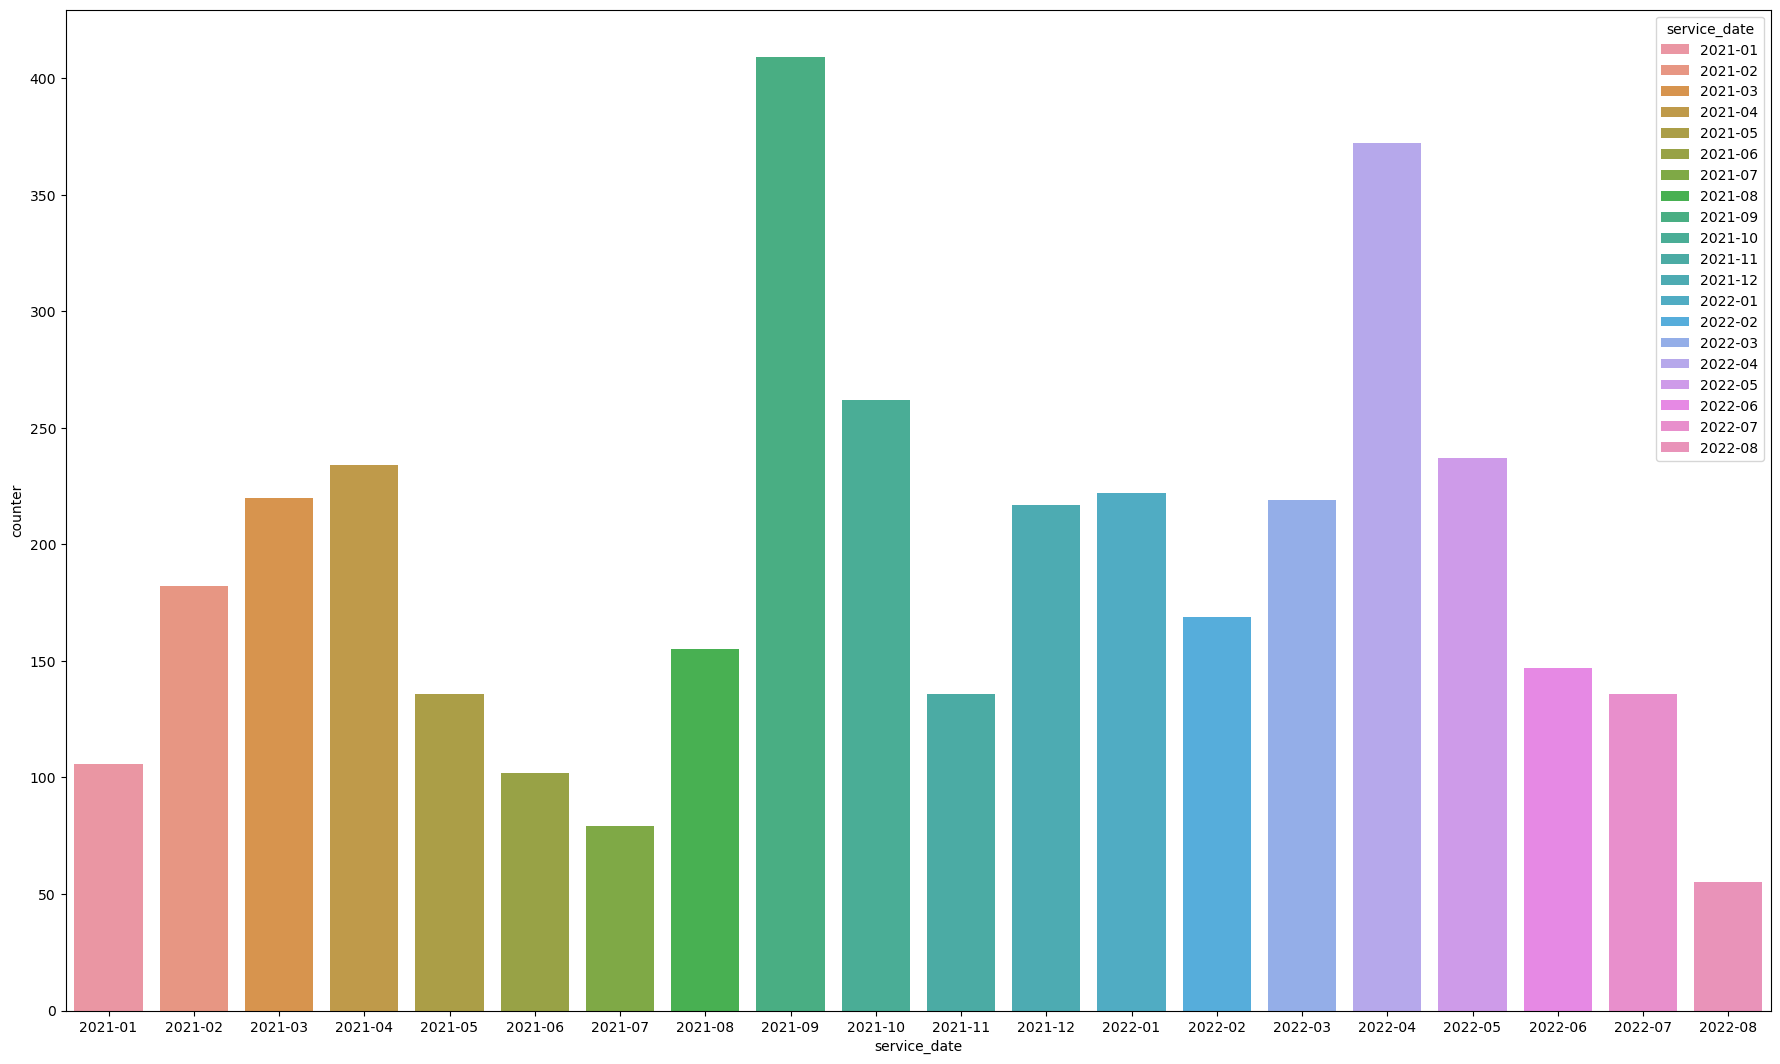

In [42]:
#визуализация данных
plt.figure(figsize=(22,13))
ax = sns.barplot(x='service_date', y='counter', hue='service_date', data=teenagers_df_grouping_by_service_date, ci= None, dodge=False)

**Вывод:**

Видно три явных пика:
* Апрель 2021 года
* Сентябрь 2021 года
* Апрель 2022 года

Данных за сентябрь 2022 года нет. Но судя по закономерности спада посещений клиники с мая по июль 2021 года и такого же спада с мая по июль 2022 года, можно предположить, что в сентябре 2022 года также будем наблюдать пик.

Это может быть связано либо с обострением заболеваний пациентов на фоне эпидемии ковида, либо как мы и предполагали, клиенты проходят медосмотры перед поступлением в университеты/армию или по рабочим причинам.

### 2. Гипотеза - пожилые клиенты в среднем платят меньше за услуги, чем рабочее поколенее

In [43]:
adult_df = df[(df['age_for_service_date'] >= 25) & (df['age_for_service_date'] < 65)]
adult_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [44]:
older_df = df[(df['age_for_service_date'] >= 65)]
older_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
536,30268210603,2021-01-14,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,176394,2.0,65
537,30268210703,2021-01-14,АЛТ (аланинаминотрансфераза),278,1,176394,2.0,65
538,30268210803,2021-01-14,АСТ (аспартатаминотрансфераза),242,1,176394,2.0,65
539,30268210903,2021-01-14,Билирубин общий,287,1,176394,2.0,65
540,30268211003,2021-01-14,Гликозилированный гемоглобин,693,1,176394,2.0,65


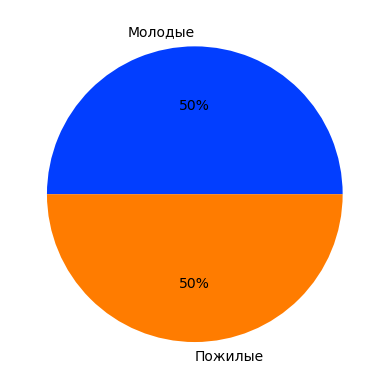

In [45]:
data = [adult_df.service_amount.sum() / len(adult_df), older_df.service_amount.sum() / len(older_df)]
labels = ['Молодые', 'Пожилые']


colors = sns.color_palette('bright')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [46]:
data

[1171.2177185952023, 1171.1582633053222]

**Вывод:** Оказывается в среднем чек у пожилых и молодых клиентов одинаков.

### 3. Гипотеза - самые часто предоставляемые услуги входят в перечень необходимых услуг для мед осмотра (щкола/универ/работа/армия)

In [47]:
#cписок услуг предоставляемых в клинике
list(df.service_name.value_counts().keys())[-10:]

['Удаление гемангиомы радиохирургическим методом',
 'HSV 2 (вирус простого герпеса 2) (Кровь)',
 'Прием мануального терапевта, ведущего специалиста',
 'Проведение хирургической манипуляции 2 степени сложности',
 'HSV 1/2 (вирус простого герпеса 1/2) (Кровь)',
 'Коагуляция при носовом кровотечении р/х ножом',
 'Введение турунды с лекарственными формами в нос',
 'Андростендион',
 'МРТ локтевого сустава',
 'Ренин']

С помощью интернета нашли типичный список анализов для медосмотра (для обоих полов, не брали гинекологию) и сравнили со списком имеющихся услуг в датасете и выбрали подходящие.

In [48]:
medical_checkup_list = [
    'Прием первичный',                                
    'Прием повторный',   
    'Общий анализ мочи',
    'Холестерин',
    'Глюкоза крови натощак',
    'Глюкоза крови',
    'Взятие крови из периферической вены', 
    'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
    'Рентгенография легких в прямой проекции',
    'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)',
    'Прием терапевта, первичный',
    'Прием терапевта , повторный',
    'Прием терапевта на дому (до МКАД)',
    'Прием психотерапевта'
]

In [49]:
medical_checkup_df = df[df['service_name'].isin(medical_checkup_list)]
medical_checkup_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
10,30268158003,2021-01-26,Прием повторный,1313,1,490777,2.0,26


In [50]:
medical_checkup_grouping_by_services = medical_checkup_df.groupby('service_name').agg(counter=('record_id', 'count'))
medical_checkup_grouping_by_services = medical_checkup_grouping_by_services.reset_index() 
medical_checkup_grouping_by_services.sort_values(by=['counter'], inplace=True, ascending=False)
medical_checkup_grouping_by_services

,service_name,counter
5,Прием первичный,6058
6,Прием повторный,4477
0,Взятие крови из периферической вены,4215
3,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",3190
4,Общий анализ мочи,1550
1,Глюкоза крови,744
8,"Прием терапевта , повторный",714
13,Холестерин,254
10,"Прием терапевта, первичный",79
2,Глюкоза крови натощак,27


In [51]:
other_services_df = df[~df['service_name'].isin(medical_checkup_list)]
other_services_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26


In [52]:
other_services_grouping_by_services = other_services_df.groupby('service_name').agg(counter=('record_id', 'count'))
other_services_grouping_by_services = other_services_grouping_by_services.reset_index() 
other_services_grouping_by_services.sort_values(by=['counter'], inplace=True, ascending=False)
other_services_grouping_by_services

,service_name,counter
395,Магнитотерапия (1 сеанс),2838
177,Взятие мазка,1567
352,Лазеротерапия (1 сеанс),1313
269,Интерференционные токи (1 сеанс) (4 поля),1195
214,Гинекологический мазок,1194
...,...,...
165,"Вакцинация вакциной ""ОПВ""",1
164,"Вакцинация вакциной ""Менактра""",1
163,"Вакцинация вакциной ""Варилрикс""",1
161,ВИТАМИН В6,1


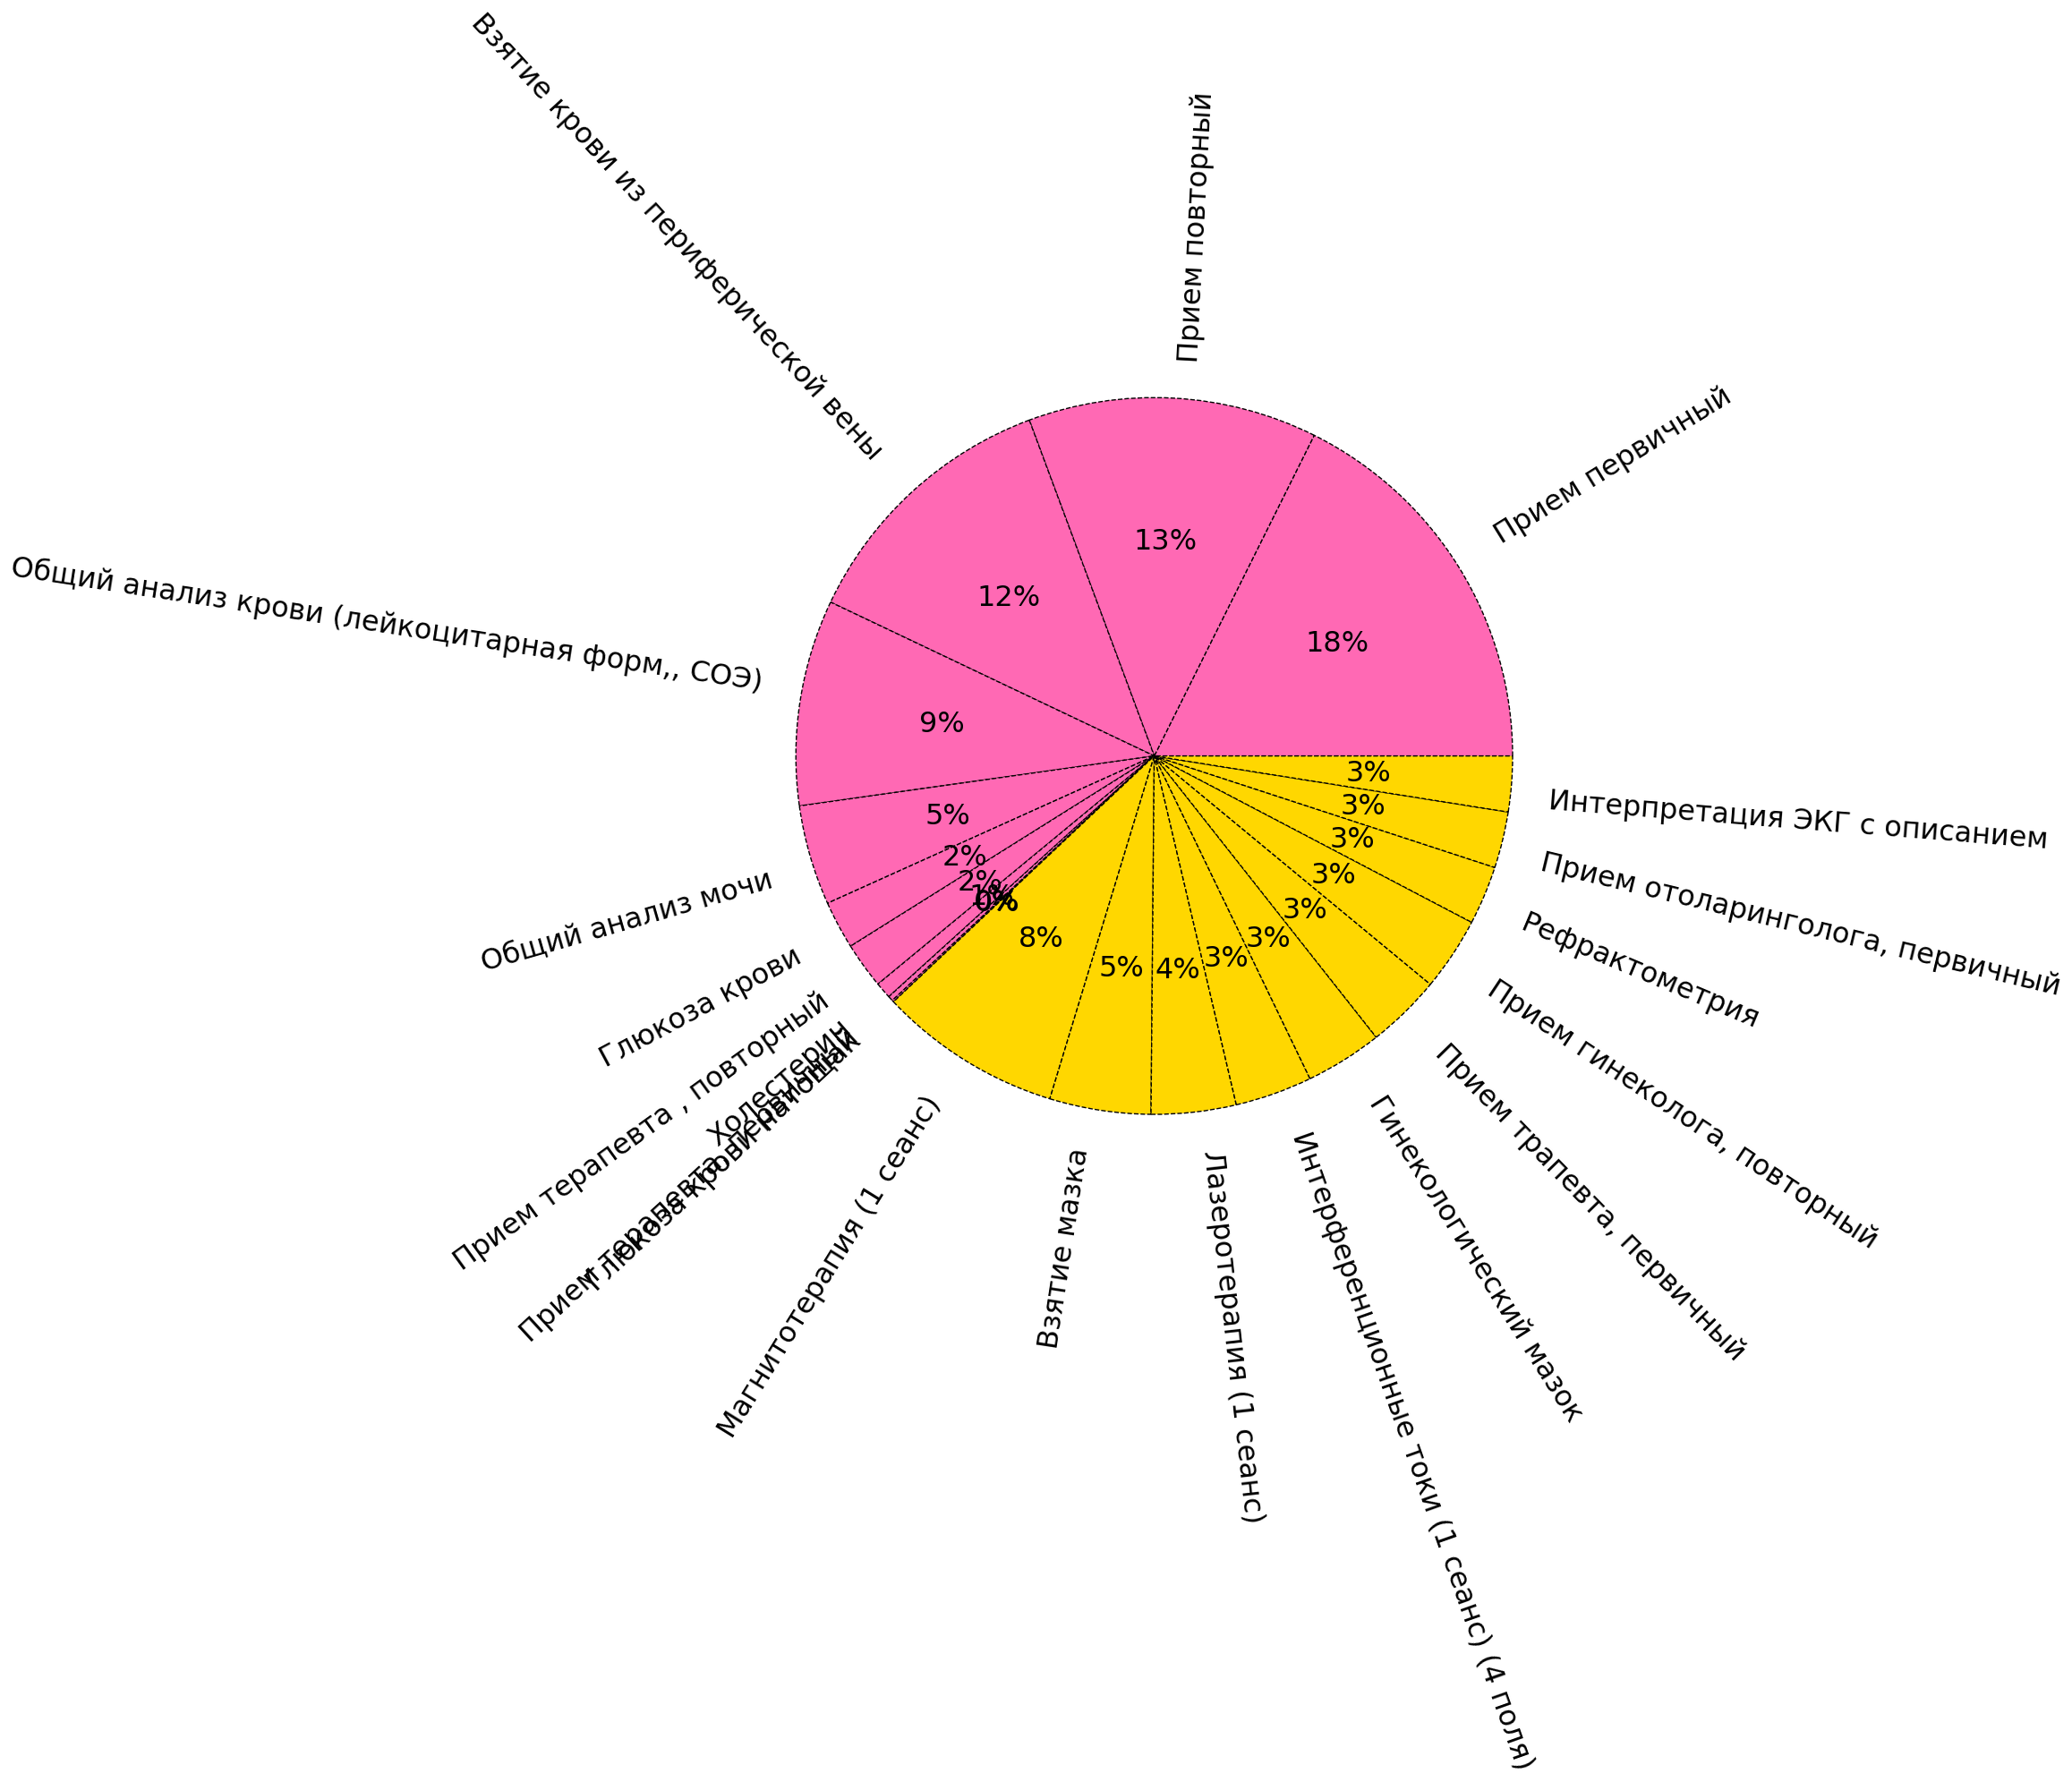

In [53]:
data = [*list(medical_checkup_grouping_by_services.head(10).counter.values), *list(other_services_grouping_by_services.head(10).counter.values)]
labels = [*list(medical_checkup_grouping_by_services.head(10).service_name.values), *list(other_services_grouping_by_services.head(10).service_name.values)]

n = len(medical_checkup_grouping_by_services)  
m = len(other_services_grouping_by_services)  
colors = [*['#FF69B4'] * (10 if n > 10 else n), *['#FFD700'] * (10 if m > 10 else m)]

plt.rcParams['font.size'] = 23.0
plt.figure(figsize=(22,13))
plt.pie(data, labels = labels, colors = colors, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True, autopct='%.0f%%')
plt.show()

К розовому цвету относятся все услуги в рамках мед комиссии, к желтому топ 10 прочих.

In [54]:
general_medical_checkup_grouping_by_services = medical_checkup_grouping_by_services.copy()

Обьеденим вместе все анализы крови в единую услугу
1. 'Холестерин'
2. 'Глюкоза крови натощак'
3. 'Глюкоза крови'
4. 'Взятие крови из периферической вены'
5. 'Общий анализ крови (лейкоцитарная форм,, СОЭ)'
    
Все анализы по ренгену также обьеденим 
1. 'Рентгенография легких в прямой проекции'
2. 'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)'
    
Все услуги терапевта также обьеденим
1. 'Прием терапевта, первичный'
2. 'Прием терапевта , повторный'
3. 'Прием терапевта на дому (до МКАД)'
   

In [55]:
general_medical_checkup_grouping_by_services.loc[
    (general_medical_checkup_grouping_by_services['service_name'] == 'Холестерин') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Глюкоза крови натощак') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Глюкоза крови') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Взятие крови из периферической вены') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Общий анализ крови (лейкоцитарная форм,, СОЭ)') 
, 'service_name'] = 'Анализ крови'

general_medical_checkup_grouping_by_services.loc[
    (general_medical_checkup_grouping_by_services['service_name'] == 'Рентгенография легких в прямой проекции') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)')
, 'service_name'] = 'Рентген'

general_medical_checkup_grouping_by_services.loc[
    (general_medical_checkup_grouping_by_services['service_name'] == 'Прием терапевта, первичный') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Прием терапевта , повторный') |
    (general_medical_checkup_grouping_by_services['service_name'] == 'Прием терапевта на дому (до МКАД)')
, 'service_name'] = 'Терапевт'

general_medical_checkup_grouping_by_services

,service_name,counter
5,Прием первичный,6058
6,Прием повторный,4477
0,Анализ крови,4215
3,Анализ крови,3190
4,Общий анализ мочи,1550
1,Анализ крови,744
8,Терапевт,714
13,Анализ крови,254
10,Терапевт,79
2,Анализ крови,27


In [56]:
general_medical_checkup_grouping_by_services = general_medical_checkup_grouping_by_services.groupby('service_name').agg(counter=('counter', 'sum'))
general_medical_checkup_grouping_by_services = general_medical_checkup_grouping_by_services.reset_index() 
general_medical_checkup_grouping_by_services

,service_name,counter
0,Анализ крови,8430
1,Общий анализ мочи,1550
2,Прием первичный,6058
3,Прием повторный,4477
4,Прием психотерапевта,12
5,Рентген,20
6,Терапевт,795


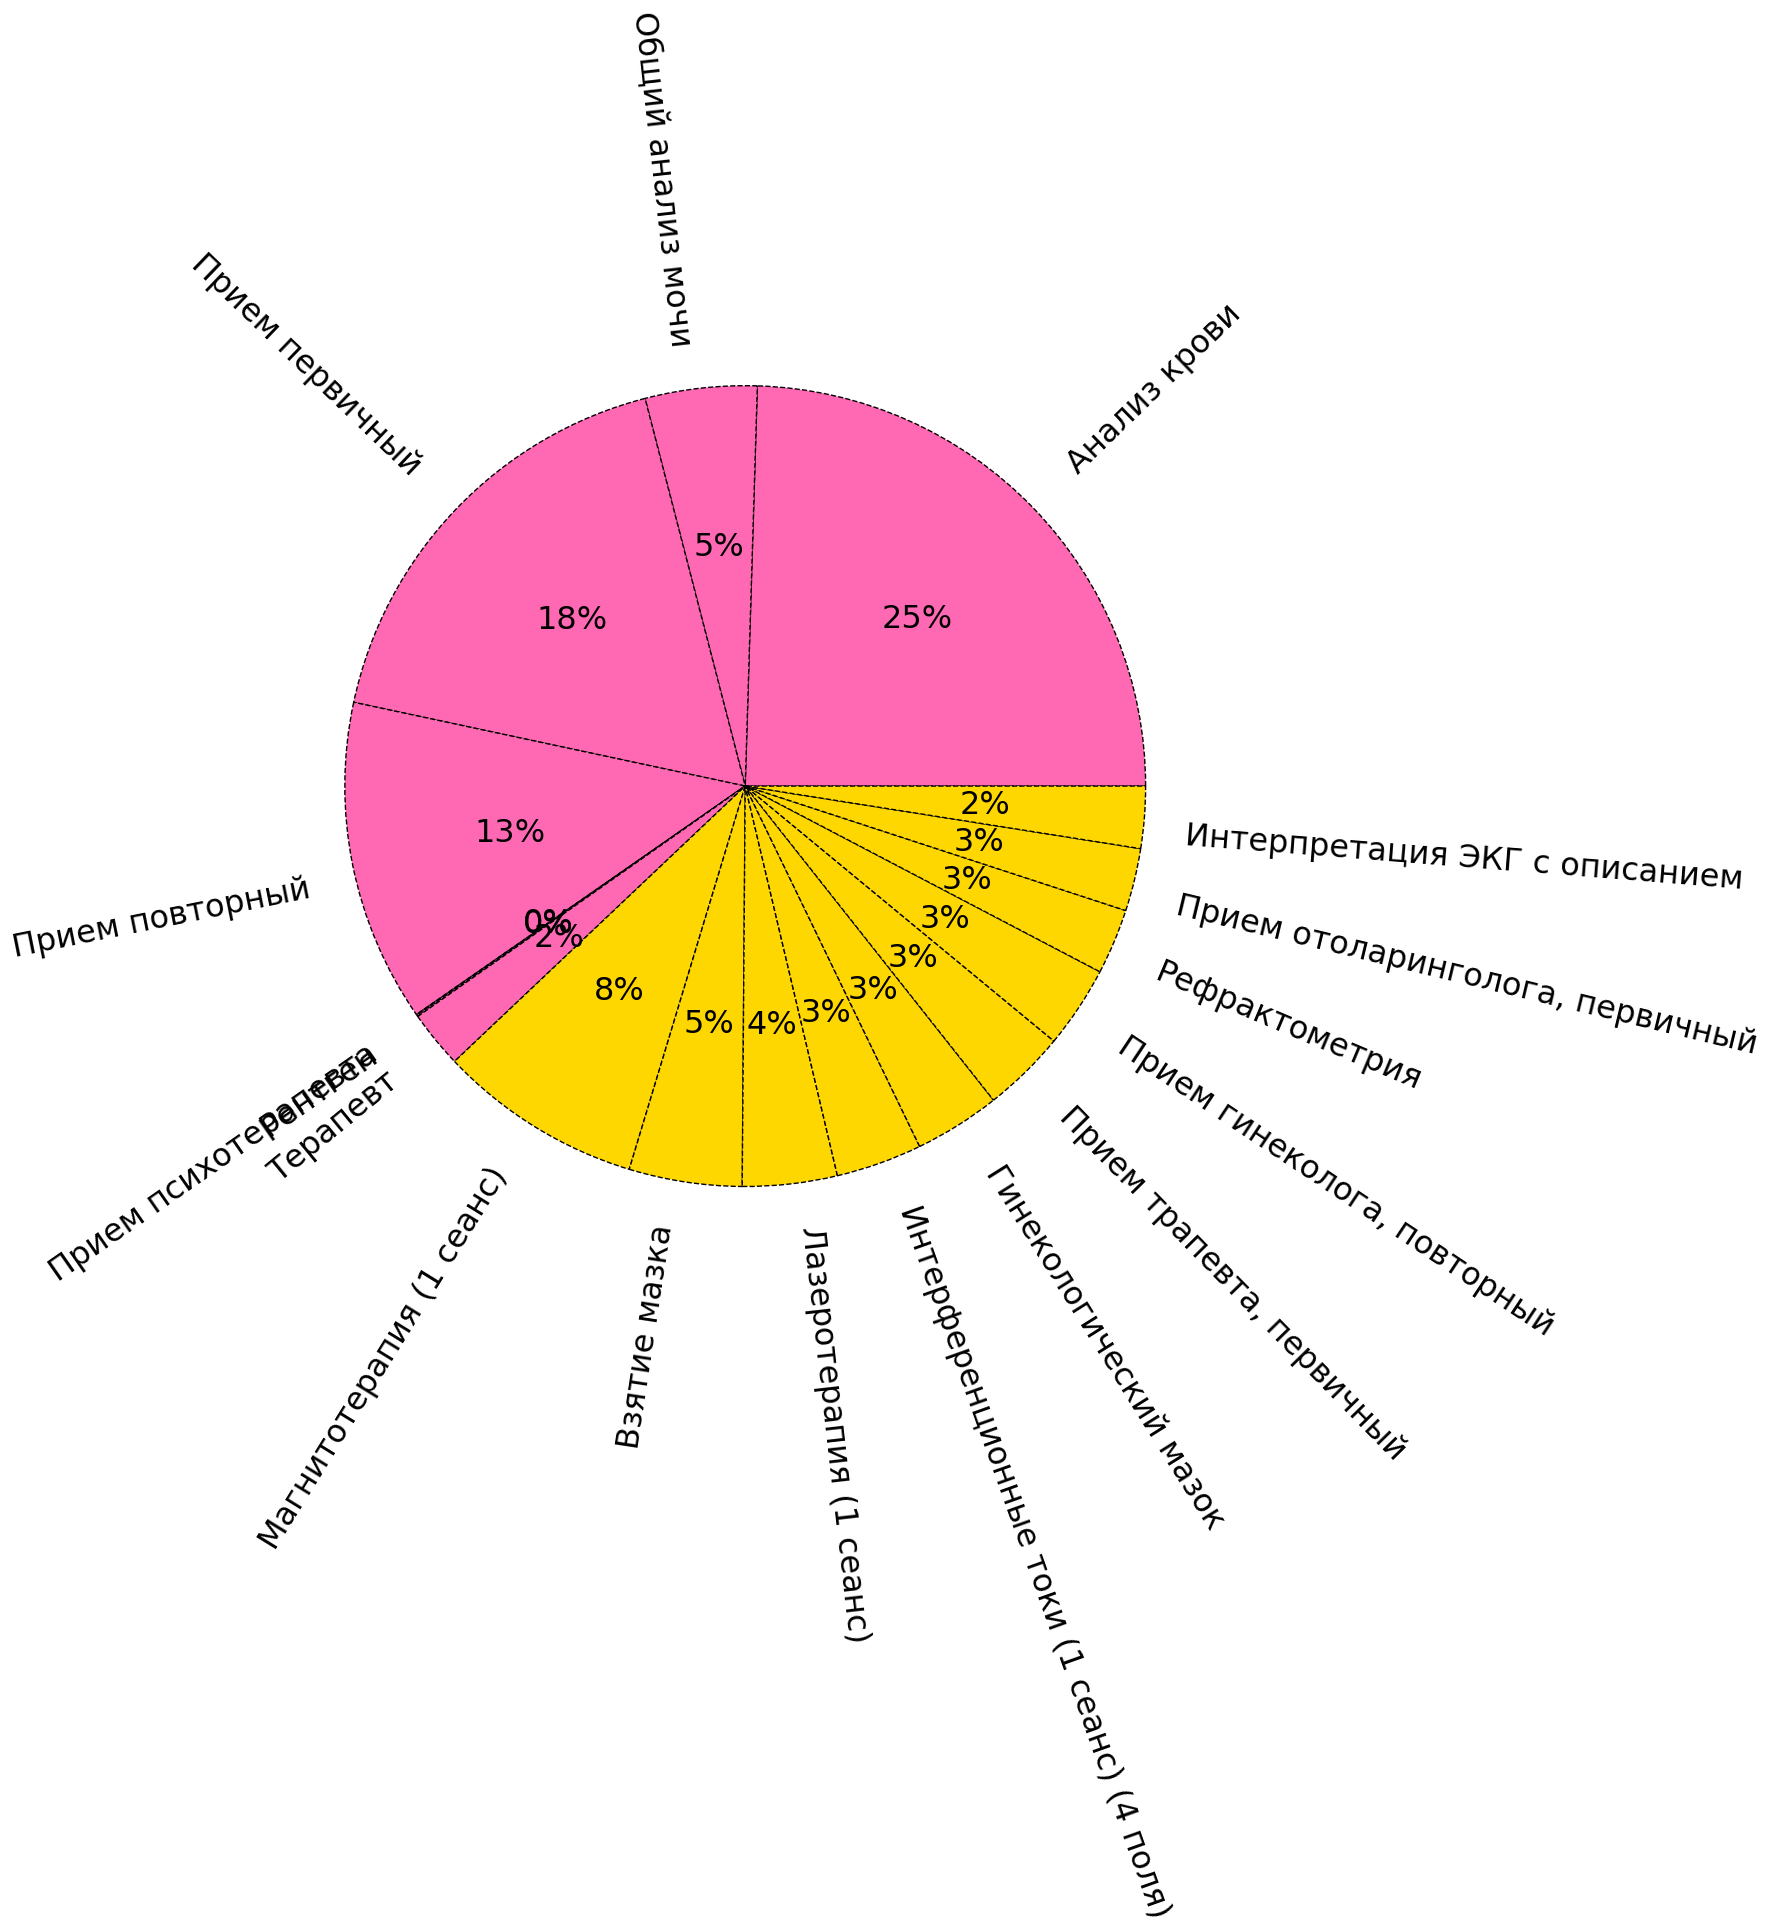

In [57]:
data = [*list(general_medical_checkup_grouping_by_services.head(10).counter.values), *list(other_services_grouping_by_services.head(10).counter.values)]
labels = [*list(general_medical_checkup_grouping_by_services.head(10).service_name.values), *list(other_services_grouping_by_services.head(10).service_name.values)]

n = len(general_medical_checkup_grouping_by_services)  
m = len(other_services_grouping_by_services)  
colors = [*['#FF69B4'] * (10 if n > 10 else n), *['#FFD700'] * (10 if m > 10 else m)]

plt.rcParams['font.size'] = 23.0
plt.figure(figsize=(22,13))
plt.pie(data, labels = labels, colors = colors, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True, autopct='%.0f%%')
plt.show()

In [58]:
len(labels)

17

**Вывод:** видно, что наша гипотеза подтвердилась. Так, например, анализ крови занимает 25% из топ-17 отобранных услуг, 7 из которых мы отнесли к услугам для мед комиссии и 10 из которых относятся к прочим.
Далее это первичный и вторичный прием, что скорее всего подразумевает прием у терапевта. Потом идет Магнитотерапия из прочих услуг и анализ мочи с 8% и 5% соответсвенно.

## Итоги исследования

Мы проверили три гипотезы и установили:
    
Клиенты от 7 до 20 лет зачастую сдают анализы в начале осени либо в конце мая для поступления в школу/универ/армия.
Первая гипотеза подтвердилась и была бы еще точнее, если бы были предоставленным данные за полный 2022 год.

Пожилые клиенты в среднем платят меньше за услуги, чем рабочее поколенее.
При доказательстве гипотезы чек у пожилых и молодых пациентов оказался средний.

Самые часто предоставляемые услуги входят в перечень необходимых услуг для мед осмотра (щкола/универ/работа/армия).
Гипотеза подтвердилась.
